In [3]:
from random import randrange
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

##### Custom-Timer 

In [4]:
from time import perf_counter

class TimerError(Exception):
    """A Custom Error"""

class Timer:
    """Create a new Timer() object"""
    def __init__(self):
        self._start = None
        self._elapsed = None
    def start(self):
        """Start a new Timer"""
        if self._start != None:
            raise TimerError("Timer is running. Use .stop() to reset the timer")
        self._start = perf_counter()
    def stop(self):
        """Save the elapsed time and reset the timer"""
        if self._start == None:
            raise TimerError("Timer is not running. Use .start() to start a new Timer")
        self._elapsed = perf_counter() - self._start
        self._start = None
    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed == None:
            raise TimerError("Timer has not started yet. Use .start() to start a new Timer")
        return self._elapsed
    def __str__(self):
        return str(self.elapsed())

### 1. Graph 
Web graphs

In [5]:
with open('./Data_Set_Web_Graphs.txt', 'r') as f:
    edge_list = list(map(lambda x: tuple(map(int, x.split())), f.readlines()))
    adj_list = defaultdict(list)
    for edge in edge_list:
        adj_list[edge[0]].append(edge[1])

- #### Reachability
Find out how many clicks your favorite webpage is from the given home page.

In [6]:
def Clicks(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}

    with open('./reachability.csv', 'w') as f:
        f.write(f'Home Page,Webpage,Clicks\n')

    for node in adj_list:
        if not visited[node]:
            path = {i: 0 for i in range(6301)}
            queue = []
            queue.append(node)
            visited[node] = True
            
            with open('./reachability.csv', 'a') as f:
                f.write(f'{node},{node},{0}\n')
                while queue:
                    head = queue.pop(0)
                    if head in adj_list:
                        for neighbour in adj_list[head]:
                            if not visited[neighbour]:
                                visited[neighbour] = True
                                path[neighbour] = path[head] + 1
                                queue.append(neighbour)
            
                for i in path:
                    if path[i] != 0:
                        f.write(f'{node},{i},{path[i]}\n')

Clicks(adj_list)
df = pd.read_csv('./reachability.csv')
df.sample(10)

,Home Page,Webpage,Clicks
5956,0,6226,10
4088,0,4343,6
3439,0,3691,7
1467,0,1642,7
3507,0,3759,5
1598,0,1801,6
2314,0,2535,6
2943,0,3181,7
3932,0,4184,6
3869,0,4121,5


- #### Topological Ordering
Is it possible to linearly order a huge network of webpages?

In [9]:
def topological(adj_list):
    indegree = {i:0 for i in range(6301)}
    for i in adj_list:
        for j in adj_list[i]:
            indegree[j] += 1
    
    while indegree:
        l = [i for i in indegree if not indegree[i]]
        if l == []:
            break
        l = l[0]
        print(l, '', end='', sep=' -> ')
        if l in adj_list:
            for i in adj_list[l]:
                indegree[i] -= 1
        indegree.pop(l)

topological(adj_list)

0 -> 1 -> 6 -> 22 -> 26 -> 44 -> 46 -> 52 -> 66 -> 70 -> 72 -> 74 -> 98 -> 109 -> 192 -> 194 -> 236 -> 24 -> 237 -> 239 -> 242 -> 245 -> 310 -> 316 -> 317 -> 319 -> 320 -> 366 -> 399 -> 403 -> 408 -> 410 -> 417 -> 421 -> 428 -> 431 -> 439 -> 441 -> 444 -> 445 -> 447 -> 516 -> 517 -> 519 -> 525 -> 537 -> 539 -> 543 -> 545 -> 546 -> 636 -> 639 -> 641 -> 644 -> 647 -> 653 -> 719 -> 723 -> 752 -> 775 -> 797 -> 896 -> 899 -> 903 -> 905 -> 929 -> 934 -> 936 -> 948 -> 949 -> 950 -> 961 -> 964 -> 966 -> 992 -> 994 -> 999 -> 1008 -> 1075 -> 1080 -> 1083 -> 1098 -> 1099 -> 1101 -> 1108 -> 1110 -> 1111 -> 1112 -> 1113 -> 1117 -> 1119 -> 1121 -> 1161 -> 1181 -> 1182 -> 1183 -> 1185 -> 1186 -> 1187 -> 1188 -> 1189 -> 1190 -> 1200 -> 1201 -> 1204 -> 1205 -> 1206 -> 1207 -> 1218 -> 1000 -> 1222 -> 1225 -> 1226 -> 1237 -> 1238 -> 1241 -> 1242 -> 1244 -> 1247 -> 1260 -> 1263 -> 1286 -> 1293 -> 1294 -> 1296 -> 1298 -> 1307 -> 1308 -> 1312 -> 1314 -> 1315 -> 1398 -> 1399 -> 1403 -> 1406 -> 1410 -> 1445 -

Topological sort is only applicable on Directed Acyclic Graph (DAG). Since, this dataset contains cycles, the algorithm stops midway. 

- #### Webpage Navigation
Find the strongly connected components in the graph.

In [10]:
def find_stronglly_connected(adj_list: dict) -> None:
    visited = {i: False for i in range(6301)}
    nodes = list(adj_list.keys())
    stack = []
    for node in nodes:
        if not visited[node]:
            DFS(adj_list, visited, node, stack)

    with open('./strongly_connected.csv', 'w') as f:
        f.write('Components,Nodes\n')
        
    rev_graph = reverse_graph(edge_list)
    visited = {i: False for i in range(6301)}
    
    with open('./strongly_connected.csv', 'a') as f:
        while stack:
            i = stack.pop()
            grp = []
            if not visited[i]:
                DFS(rev_graph, visited, i, grp)
                component = str(list(reversed(grp))).replace(', ', '-')
                n = len(component.split('-'))
                f.write(f'{component},{n}\n')
                

def DFS(adj_list: dict, visited: dict, v: int, stack: list) -> None:
    visited[v] = True

    if v in adj_list:
        for neighbour in adj_list[v]:
            if not visited[neighbour]:
                DFS(adj_list, visited, neighbour, stack)
    stack.append(v)

def reverse_graph(edge_list: list) -> dict:
    rev_graph = defaultdict(list)
    for edge in edge_list:
        rev_graph[edge[1]].append(edge[0])
    return rev_graph

find_stronglly_connected(adj_list)
df = pd.read_csv('./strongly_connected.csv')
df.sample(10)


,Components,Nodes
2003,[3970],1
1494,[4486],1
2742,[3105],1
3779,[2078],1
3063,[3057],1
1819,[4785],1
3678,[4491],1
2688,[4802],1
4178,[3299],1
344,[1164],1


- #### Bi-Connected Components
Find articulation points and using it find the components

In [18]:

#Bi-Connected components
size = 6301
Time = 0
Count = 0

'''A recursive function that finds and prints strongly connected components using DFS traversal 
u --> The vertex to be visited next 
disc[] --> Stores discovery times of visited vertices 
low[] -- >> earliest visited vertex (the vertex with minimum 
            discovery time) that can be reached from subtree 
            rooted with current vertex 
st -- >> To store visited edges
'''

def BCCUtil(adj_list, u, parent, low, disc, st): 

    # Count of children in current node  
    children = 0
    global Time
    global Count
    # Initialize discovery time and low value 
    disc[u] = Time 
    low[u] = Time 
    Time += 1


    # Recur for all the vertices adjacent to this vertex 
    for v in adj_list[u]: 
        # If v is not visited yet, then make it a child of u 
        # in DFS tree and recur for it 
        if disc[v] == -1 : 
            parent[v] = u 
            children += 1
            st.append((u, v)) # store the edge in stack 
            BCCUtil(adj_list,v, parent, low, disc, st) 

            low[u] = min(low[u], low[v]) 

            # If u is an articulation point, pop  
            # all edges from stack till (u, v) 
            if parent[u] == -1 and children > 1 or parent[u] != -1 and low[v] >= disc[u]: 
                Count += 1 # increment count 
                w = -1
                l = []
                while w != (u, v): 
                    w = st.pop() 
                    l.append(w)
                print(l) 
            
        elif v != parent[u] and low[u] > disc[v]: 
            low[u] = min(low [u], disc[v]) 
            st.append((u, v)) 
  
  
# The function to do DFS traversal.  
def BCC(adj_list): 
    global Count    
    # Initialize disc and low, and parent arrays 
    disc = [-1] * (size) 
    low = [-1] * (size) 
    parent = [-1] * (size) 
    st = [] 

    # find articulation points 
    for i in range(size): 
        if disc[i] == -1: 
            BCCUtil(adj_list,i, parent, low, disc, st) 

        # If stack is not empty, pop all edges from stack 
        if st: 
            Count = Count + 1
            l=[]
            while st: 
                w = st.pop() 
                l.append(w)
            print(l) 
  
  
BCC(adj_list); 
print ("Above are %d biconnected components in graph" %(Count));

[(0, 2)]
[(112, 1064)]
[(112, 1160)]
[(112, 2044)]
[(112, 2045)]
[(5, 121)]
[(122, 578)]
[(122, 658)]
[(122, 1428)]
[(122, 1451)]
[(122, 2057)]
[(122, 2058)]
[(122, 2059)]
[(8, 520)]
[(285, 134)]
[(143, 128)]
[(143, 246)]
[(62, 1194)]
[(62, 1196)]
[(1198, 338)]
[(1158, 552)]
[(1158, 1017)]
[(1158, 1316)]
[(2146, 10)]
[(2146, 266)]
[(2146, 368)]
[(324, 568)]
[(108, 324)]
[(108, 365)]
[(108, 1486)]
[(922, 2809)]
[(922, 2810)]
[(922, 2811)]
[(922, 2812)]
[(922, 2813)]
[(922, 2814)]
[(922, 2815)]
[(922, 2816)]
[(922, 2817)]
[(326, 922)]
[(1004, 106)]
[(693, 1628)]
[(693, 2602)]
[(693, 2603)]
[(2604, 4166)]
[(693, 2604)]
[(693, 2605)]
[(697, 870)]
[(1441, 567)]
[(1441, 1957)]
[(1441, 2493)]
[(1441, 3093)]
[(1441, 3187)]
[(1441, 3298)]
[(1441, 3299)]
[(1441, 3300)]
[(1441, 3301)]
[(697, 1441)]
[(1589, 156)]
[(1589, 1056)]
[(1589, 1203)]
[(1589, 1327)]
[(2304, 1347)]
[(2304, 2189)]
[(2304, 1327), (1589, 2304)]
[(135, 34)]
[(110, 1332)]
[(706, 3501)]
[(706, 4623)]
[(706, 4624)]
[(1361, 706)]
[

### 2. Sorting 
Implement bubble sort algorithm

In [11]:
def bubble_sort(arr: list) -> None:
    n = len(arr)
    for i in range(n):
        for j in range(n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    
arr = [randrange(1000) for _ in range(10)]

print("Array before sorting:", *arr)
bubble_sort(arr)
print("Array after sorting:", *arr)

Array before sorting: 166 678 980 179 706 735 560 984 3 588
Array after sorting: 3 166 179 560 588 678 706 735 980 984


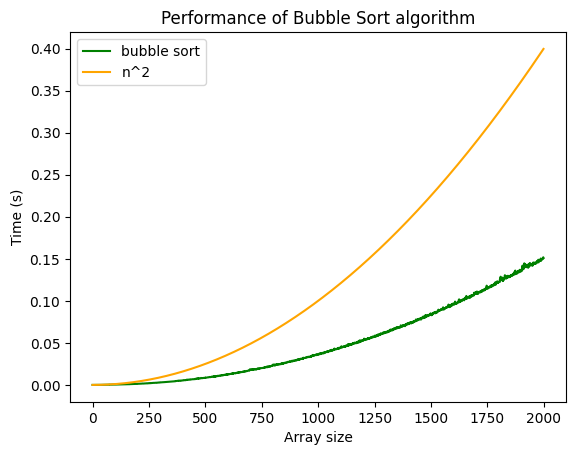

In [83]:
n = 2000
x = [i for i in range(n)]
y1 = [(i**2) * 1e-7 for i in range(n)]
y2 = []

for i in range(n):
    arr = [randrange(n) for j in range(i)]
    t = Timer()
    t.start()
    bubble_sort(arr)
    t.stop()
    y2.append(t.elapsed())

plt.plot(x, y2, color = 'green', label = 'bubble sort')
plt.plot(x, y1, color = 'orange', label = 'n^2')

plt.xlabel('Array size')
plt.ylabel('Time (s)')
plt.title('Performance of Bubble Sort algorithm')

plt.legend()
plt.show()